#### 数据预处理

In [1]:
import numpy as np
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
def processing(filepath):
    timestamp = []
    KPI = []
    leafNum = []
    FileList = listdir(filepath)
    m = len(FileList)
    # 从文件名中解析出训练集的类别
    for i in range(m):
        # 获取timestamp
        fileNameStr = FileList[i]
        classNumber = int(fileNameStr.split('.')[0])
        timestamp.append(classNumber)
        # 获取kpi的和
        data = pd.read_csv(filepath + "/" + fileNameStr, header=None, names=['i', 'e', 'c', 'p', 'l', 'KPI'])
        KPI.append(data['KPI'].sum())
        leafNum.append(len(data))
    timestamp = np.array(timestamp)
    KPI = np.array(KPI)
    leafNum = np.array(leafNum)
    return KPI, timestamp, leafNum


KPI, timestamp, leafNum = processing("../2019AIOps_data_test1")
KPISet = pd.DataFrame({"timestamp" : timestamp,"KPI": KPI, 'leafNum': leafNum})
KPISet = KPISet.sort_values(by='timestamp')
KPISet.to_csv('../result/KPI_test_with_date.csv', index=False, header=False)
KPISet['KPI'].to_csv('../result/KPI_test_without_date.csv', index=False, header=False)
print("求和成功并返回结果！")

求和成功并返回结果！


In [25]:
def formatLabel(label):
    if np.isnan(label):
        return 0
    else:
        return label

In [29]:
KPISet = pd.read_csv("../result/KPI_test_with_date.csv", names=['timestamp', 'KPI', 'leafNum'])
outlier = pd.read_csv('../Anomalytime_data_test1.csv')
tmp = pd.DataFrame()
tmp['timestamp'] = outlier['timestamp']
tmp['label'] = [1 for i in range(len(tmp['timestamp']))]

KPISet = KPISet.merge(tmp, on='timestamp', how='left')
KPISet['label'] = KPISet['label'].apply(formatLabel)
KPISet.to_csv('../result/KPI_test_with_label.csv', index=False, header=['timestamp', 'KPI', 'leafNum', 'label'])
KPISet.describe()

,timestamp,KPI,leafNum,label
count,4.032000e+03,4.032000e+03,4032.0,4032.000000
mean,1.537545e+12,1.482293e+06,30011.0,0.049603
std,3.492247e+08,7.865748e+05,0.0,0.217151
min,1.536941e+12,1.412590e+05,30011.0,0.000000
25%,1.537243e+12,8.982652e+05,30011.0,0.000000
50%,1.537545e+12,1.651903e+06,30011.0,0.000000
75%,1.537848e+12,1.946062e+06,30011.0,0.000000
max,1.538150e+12,7.052967e+06,30011.0,1.000000


In [43]:
pointLabels = list(KPISet[KPISet['label'] == 1].index)
result = {}
result['pointlabel'] = pointLabels
result['arealabel'] = []
result['timestamp'] = KPISet['timestamp'].tolist()
result['value'] = KPISet['KPI'].tolist()

import json
file = open('../result/outlierVis.json', 'w', encoding='utf-8')
json.dump(result, file, ensure_ascii=False)
file.close()

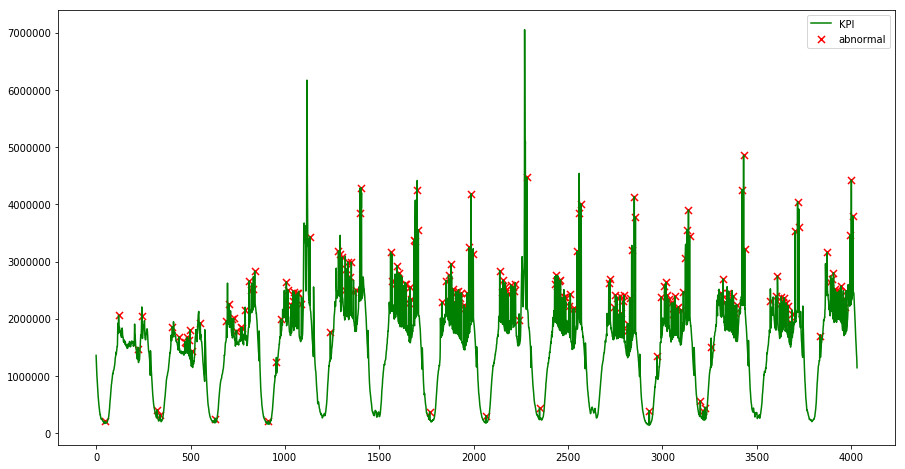

In [59]:
# import seaborn as sns
# %matplotlib inline
# sns.countplot(x='timestamp', data=result)
plt.figure(figsize=(15,8))
plt.plot(KPISet['KPI'], 'g', label='KPI')
plt.scatter(KPISet[KPISet['label'] == 1].index, KPISet[KPISet['label'] == 1]['KPI'], s=50, marker='x', color='red', label='abnormal')
plt.legend(loc='best')